<h2><center>CSCI6409 Process of Data Science</center></h2>

<h2><center>Assignment 3<center></h2>
<b>Sarthak Pandit B00900388</b>
    
<b>Sagar Devesh B00905507</b>

### Question 1

Installing Dependencies

In [4]:
# importing the relevant modules
import pandas as pd 
import numpy as np
from datetime import date 
import datetime
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     /users/grad/devesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /users/grad/devesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing data

In [5]:
# Data source
data = pd.read_json('sample1.jsonl', lines=True)

In [6]:
data['vote'].isna().sum()

804511

In [7]:
data['image'].isna().sum()

997767

We see a lot of missing values in 'vote' and 'image' columns. It would be ideal to drop them during data preprocessing.

In [8]:
data.shape

(1000000, 12)

### Identifying data quality issues and pre-processing data according to data quality plan
As part of data pre-processing, we imported the raw data from the JSON file using Pandas package. Once the data gets imported we perform sanity checks and observe the data to make it ready for analysis.

As part of pre-processing, we perform the following operations - 

i) <b>Removed Nan values.</b> Ex - Column - 'image' and 'vote', contain a lot of Nan values.

ii) <b>Reset index</b>

iii) <b>Extracted text from the columns which were in non-string format.</b> Ex - Column 'style' is in JSON format of key-value pair. To extract useful information, we extract the value and kept it in a seprate column called 'styleUpdate'.

In [9]:
#Extracting value column from style
data['styleUpdate'] =data['style'].astype('str').replace("'}",'', regex=True).replace("{'Format:': '","",regex = True)


#Dropping image and vote column
data = data.drop(['image', 'vote'], axis = 1)
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,styleUpdate
0,3,False,"05 18, 2002",AJ8AQG2X9JJ2Y,0001712799,{'Format:': ' School & Library Binding'},Donald Gillies,Dr. Seuss has some really brilliant books. Th...,A below-average Dr. Seuss Book,1021680000,School & Library Binding
1,5,True,"12 11, 2014",A12Q7B7NT716RV,0001712799,{'Format:': ' Hardcover'},True Value Girl,Love it,Five Stars,1418256000,Hardcover
2,4,False,"01 6, 2006",A1DK5AZMXS1QA3,0002006448,{'Format:': ' Hardcover'},Newton Ooi,Hand-woven carpets are one of the few products...,Tourism as history,1136505600,Hardcover
3,4,False,"12 8, 2014",A1JMSX54DO3LOP,0002005263,{'Format:': ' Kindle Edition'},Bookzilla,"Compelling, twisting mystery involving several...","Compelling, twisting mystery",1417996800,Kindle Edition
4,2,True,"03 3, 2014",A2IP27AZB3D1SM,0002005263,{'Format:': ' Kindle Edition'},J. A. Drummond,I have read many of the Hillerman books and en...,Tony missed the mark,1393804800,Kindle Edition
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,True,"12 1, 2017",A1PLIAXAWGGEZO,B01HH2OZVS,{'Format:': ' Kindle Edition'},Linda Cope,What I liked most was the personal stories of ...,What I liked most was the personal stories of ...,1512086400,Kindle Edition
999996,3,False,"12 22, 2016",A1Q3MLS48AUBKO,B01HHC2MD6,{'Format:': ' Kindle Edition'},weaselbit,The story is alright. The writing style is a b...,The story is alright. The writing style is a ...,1482364800,Kindle Edition
999997,5,False,"07 2, 2016",A34MRZFAZPPESL,B01HHC2MD6,{'Format:': ' Kindle Edition'},skygypsy,l really loved this little book. The author's...,A Lovely Little Feel-Good Story,1467417600,Kindle Edition
999998,5,True,"01 26, 2017",ARFHS6IU8WI0,B01HIIHU7W,{'Format:': ' Kindle Edition'},DonnaL,I have read everything Keith Blackmore has wri...,Love Keith Blackmore's books!,1485388800,Kindle Edition


In [10]:
data = data.dropna()
data.shape

(981723, 11)

In [11]:
#Reset index
df = data.reset_index()

Downsampling - We have taken 10000 rows to run our model. We tried to run our model with more number of rows, however the performance of the model was pretty similar with larger dataset. Also, there were instances when we the kernel died when we took larger dataset.

In [12]:
df = df.sample(n = 10000, random_state=42)

In [13]:
df.shape

(10000, 12)

### Calculating properties of textual data
Since the a lot of fields in the dataset are textual fields, we will be calculating following properties of the textual data

i) Text length (i.e., the number of characters).

ii)  The number of words.

iii) Presence of non-alphanumeric characters.

In [14]:
#Calculating length of Text column
df['reviewTextLength'] = df['reviewerName'].str.len()
df['summaryLength'] = df['summary'].str.len()
df['styleUpdateLength'] = df['styleUpdate'].str.len()

In [15]:
#Calculating number of words 
df['reviewTextCount'] = df['reviewText'].str.count(' ') + 1
df['summaryCount'] = df['summary'].str.count(' ') + 1
df['styleUpdateCount'] = df['styleUpdate'].str.count(' ') + 1

In [16]:
#Calculating whether column contains non-alphanumeric characters
df['reviewTextAlphaNum'] = df['reviewerName'].str.isalnum()
df['summaryAlphaNum'] = df['summary'].str.isalnum()
df['styleUpdateAlphaNum'] = df['styleUpdate'].str.isalnum()

### Data Quality Report

To calculate data quality report for both categorical and continous features, we select only those columns which contain ,the properties of the textual data

In [17]:
#Fetching only relevant properties in a separate dataset for performing analysis and generating data quality reports
df_DQR = df[["overall", "verified", "reviewTime", "reviewerID", "asin", "reviewTextLength", "summaryLength",
            "reviewTextCount", "summaryCount", "reviewTextAlphaNum", "summaryAlphaNum",
             "styleUpdateLength", "styleUpdateCount", "styleUpdateAlphaNum"]]

### Continuous features report

Continous features report includes the following -
1. Minimum
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Maximum
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - Number of unqiue values for a given feature

In [18]:
#Defining function to generate data quality report for continuous features in the dataset
def build_continuous_features_report(data_df):
    
    stats = {
        "Count": len,
        "Miss %": lambda churn_df: churn_df.isna().sum() / len(churn_df) * 100,
        "Card.": lambda churn_df: churn_df.nunique(),
        "Min": lambda churn_df: churn_df.min(),
        "1st Qrt.": lambda churn_df: churn_df.quantile(0.25),
        "Mean": lambda churn_df: churn_df.mean(),
        "Median": lambda churn_df: churn_df.median(),
        "3rd Qrt": lambda churn_df: churn_df.quantile(0.75),
        "Max": lambda churn_df: churn_df.max(),
        "Std. Dev.": lambda churn_df: churn_df.std(),
    }
    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [19]:
build_continuous_features_report(df_DQR)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
overall,10000,0.0,5,1,4.0,4.3620,5.0,5.0,5,1.002026
reviewTextLength,10000,0.0,55,1,7.0,11.2385,11.0,15.0,104,5.421177
summaryLength,10000,0.0,132,1,10.0,26.0436,19.0,34.0,192,20.419784
reviewTextCount,10000,0.0,702,1,21.0,98.1421,43.0,108.0,2666,154.244481
summaryCount,10000,0.0,30,1,2.0,4.6655,3.0,6.0,34,3.795636
styleUpdateLength,10000,0.0,19,4,10.0,13.2803,15.0,15.0,32,2.955741
styleUpdateCount,10000,0.0,4,2,2.0,2.6508,3.0,3.0,5,0.543221


### Categorical features report

Categorical features report includes:
1. Mode - most repeated value (value with highest frequency)
2. 2nd mode - 2nd most repeated value
3. Frequency of mode
4. Proportion of mode in the dataset
5. Frequency of 2nd mode
6. Proportion of 2nd mode in the dataset
7. % missing values
8. Cardinality - number of unique values for a given feature


In [20]:
#Defining function to generate data quality report for categorical features in the dataset
def build_categorical_features_report(data_df):

    def _mode(data_df):
        return data_df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(data_df):
        return data_df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(data_df):
        return data_df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list()).T

    def _second_mode_freq(data_df):
        return data_df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda data_df: data_df.isna().sum() / len(data_df) * 100,
        "Card.": lambda data_df: data_df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda data_df: _mode_freq(data_df) / len(data_df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda data_df: _second_mode_freq(data_df) / len(data_df) * 100,
    }

    feature_names = data_df.select_dtypes(exclude="number").columns
    print(feature_names)
    continuous_data_df = data_df[feature_names]
    report_df = pd.DataFrame(index=feature_names, columns=stats.keys())
    
    
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df



Removing boolean variables in the dataset to calculate categorical data quality report

In [21]:
df_removed = df_DQR.drop(["verified"],axis = 1).drop(["reviewTextAlphaNum"], axis =1).drop(["summaryAlphaNum"] ,axis =1).drop(["styleUpdateAlphaNum"] ,axis =1)

In [22]:
build_categorical_features_report(df_removed)

Index(['reviewTime', 'reviewerID', 'asin'], dtype='object')


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
reviewTime,10000,0.0,3226,"[07 18, 2017]",18,0.18,"[07 22, 2014]",16,0.16
reviewerID,10000,0.0,9817,[A2F6N60Z96CAJI],4,0.04,"[A15RKFWXR5W3PP, A1K4S4MWXI9E9M, A1UH21GLZTYYR...",30,0.30
asin,10000,0.0,9250,"[0297859382, B000X1MX7E]",22,0.22,[0099911701],9,0.09


### Top 50 words in each textual column

To calculate top 50 words in each textual column, we execute the following steps - 

i) Remove all the stop words

ii) Stack all the words in one given column 

iii) Calculate number of occurences for each word and select the top 50 words with highest occurences

In [23]:
df_clean = df[["reviewerName", "reviewText", "summary", "styleUpdate"]].dropna().replace('[^a-zA-Z0-9 ]', '', regex=True) #removing special characters 



In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


### Reviewer Name

In [25]:
#reviewerName
df_clean['reviewerName_withoutStopWords'] = df_clean.reviewerName.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_clean.reviewerName_withoutStopWords.str.split(expand=True).stack().value_counts().to_frame().head(50)

,0
Customer,876
Amazon,518
Kindle,375
J,203
M,200
A,188
L,170
C,159
S,129
D,127


### Reviewer Text

In [26]:
#reviewerText
df_clean['reviewText_withoutStopWords'] = df_clean.reviewText.dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [27]:
df_clean["reviewText_withoutStopWords"].str.split(expand=True).stack().value_counts().to_frame().head(50)

,0
I,19794
book,11526
read,5110
The,4981
story,4386
one,3825
This,3118
like,2684
love,2379
books,2278


### Summary

In [28]:
#summary
df_clean['summary_withoutStopWords'] = df_clean.summary.dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.summary_withoutStopWords.str.split(expand=True).stack().value_counts().to_frame().head(50)

,0
Stars,1303
Five,939
book,931
A,723
read,660
I,586
Great,574
The,349
good,348
Good,342


### Style

In [29]:
#styleUpdate
df_clean['styleUpdate_withoutStopWords'] = df_clean.styleUpdate.dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.styleUpdate_withoutStopWords.str.split(expand=True).stack().value_counts().to_frame().head(50)

,0
Edition,5686
Kindle,5685
Paperback,2698
Hardcover,1384
Mass,321
Market,321
book,50
Board,50
Audio,43
CD,41


### Proportion of each format within the style column

In [30]:
df_clean['styleUpdate_withoutStopWords'].value_counts().sort_values()

Bookmark                             1
Preloaded Digital Audio Player       1
Misc                                 1
CDROM                                1
Style Name 9th Edition               1
Roughcut                             1
Textbook Binding                     1
Bluray                               1
Pocket Book                          1
Color Paperback                      1
School Library Binding               1
Stationery                           1
Card Book                            2
Amazon Video                         2
Ringbound                            2
Unknown Binding                      2
Library Binding                      2
Staple Bound                         3
Diary                                3
Leather Bound                        3
Kindle Edition AudioVideo            3
Vinyl Bound                          3
Bonded Leather                       3
Map                                  3
MP3 CD                               4
Flexibound               

Based on the above results, 

i) Format with highest occurence - <b>Kindle Edition</b>

ii) Format with lowest occurence - <b>Size XLarge, Paperback Bunko, Print Demand , Color Foam Gliders 995, Diskette</b>

### Patterns within the data

After closely analysing the data, we can observe a pattern of reviews for various formats. 

<b>Pattern I</b> - The number of review ratings are in the exact same descending order as the rating itself.

In [31]:
#1.4.4 - Overall Score
df['overall'].value_counts()

5    6180
4    2258
3     871
2     384
1     307
Name: overall, dtype: int64

<b>Pattern II</b> - Distribution of reviews for highest reviewed format - 'Kindle Edition' 

The distribution is same as that of the overall distribution. More people have given positive reviews than negative reviews. More than 50% of reviews are coming from 4 and 5 rating.

In [32]:
df_kindle = df[df['styleUpdate'].str.contains('Kindle Edition')]
df_kindle['overall'].value_counts()

5    3443
4    1380
3     497
2     199
1     166
Name: overall, dtype: int64

<b>Pattern III</b> - Distribution of review text length.

Based on the count of the review text, it can be observed that highest number of reviews have total length as just 2 words.

In [33]:
df["reviewTextCount"].value_counts()

2       291
21      218
23      205
22      200
20      173
       ... 
1775      1
803       1
843       1
859       1
787       1
Name: reviewTextCount, Length: 702, dtype: int64

In [34]:
df.head(20)

,index,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,styleUpdate,reviewTextLength,summaryLength,styleUpdateLength,reviewTextCount,summaryCount,styleUpdateCount,reviewTextAlphaNum,summaryAlphaNum,styleUpdateAlphaNum
278056,281077,2,True,"09 12, 2014",A4K6YWO1XO8E2,0553099957,{'Format:': ' Kindle Edition'},Rick,Mildly amusing but tiresome and repetitive in ...,Mildly amusing but tiresome and repetitive in ...,...,Kindle Edition,4,52,15,72,8,3,True,False,False
948792,965612,5,False,"03 4, 2014",A2CAWO3IRUS9C7,1609078063,{'Format:': ' Paperback'},Stephanie Buckner,"In this day and age, with modern media telling...",Discover True Beauty!,...,Paperback,17,21,10,263,3,2,False,False,False
638299,643206,5,True,"11 1, 2015",A2YJMETJWHZKLT,1518661564,{'Format:': ' Kindle Edition'},Mary L,Spoilers****** Such a great story! Kian is a k...,Kian and Jo.....rdan,...,Kindle Edition,6,20,15,84,3,3,False,False,False
21471,22572,5,True,"01 26, 2013",A3TCBK4JXM2GJ0,0060254939,{'Format:': ' Hardcover'},Counselor Chris,"I have this book in my office, since my childr...",A Classic!,...,Hardcover,15,10,10,64,2,2,False,False,False
893151,909004,5,True,"09 19, 2017",A3FMGCROI5BDGT,0316395072,{'Format:': ' Hardcover'},Jacqueline LaMonica,This book was wonderful! If you love books an...,Wonderful!,...,Hardcover,19,10,10,48,1,2,False,False,False
879836,895425,5,False,"09 3, 2010",AMYTL79JMGQ6D,0778327884,{'Format:': ' Paperback'},Mary Ann,This book seems to be one of a series with whi...,Better late than never,...,Paperback,8,22,10,98,4,2,False,False,False
585275,590111,5,True,"11 25, 2014",A3IP8SKF2GBNCW,1495204499,{'Format:': ' Kindle Edition'},Lyn morris,See Volume 3 comments. This first volume grab...,I love it when an author captures his/her read...,...,Kindle Edition,10,61,15,30,12,3,False,False,False
635067,639970,5,False,"10 15, 2015",A3LAGHXGTU9D1M,1517006120,{'Format:': ' Kindle Edition'},Kindle Customer,Enjoyed this first book and am really looking ...,Love this author,...,Kindle Edition,15,16,15,45,3,3,False,False,False
283237,286281,5,True,"04 18, 2011",AULBG1CBNU4J1,0553588087,{'Format:': ' Mass Market Paperback'},BARBARA F. AMES,I had never read anything by Lisa Andersen but...,TOUGH TO PUT DOWN!,...,Mass Market Paperback,15,18,22,106,4,4,False,False,False
296338,299559,4,True,"02 13, 2014",A5TJYQOA447SZ,0615816126,{'Format:': ' Kindle Edition'},Patrica Rickaby,Gritty real crime stories told by the author i...,Real Crime,...,Kindle Edition,15,10,15,41,2,3,False,False,False


### Question 2

Merging 'reviewText' and 'summary' column into one

In [35]:
df['reviewTextSumaaryMerge'] = df['reviewText'] + " " + df['summary']

In [36]:
df.shape

(10000, 22)

Removing non-alphanumeric characters in the merged column - <b>'reviewTextSumaaryMerge'</b>

In [37]:
#Removing non-alphabetic characters
df_clean['reviewTextSumaaryMerge'] = df['reviewTextSumaaryMerge'].replace('[^a-zA-Z ]', '', regex=True) 

In [38]:
df_clean.shape

(10000, 9)

In [39]:
df_clean.head()

,reviewerName,reviewText,summary,styleUpdate,reviewerName_withoutStopWords,reviewText_withoutStopWords,summary_withoutStopWords,styleUpdate_withoutStopWords,reviewTextSumaaryMerge
278056,Rick,Mildly amusing but tiresome and repetitive in ...,Mildly amusing but tiresome and repetitive in ...,Kindle Edition,Rick,Mildly amusing tiresome repetitive places Im t...,Mildly amusing tiresome repetitive places,Kindle Edition,Mildly amusing but tiresome and repetitive in ...
948792,Stephanie Buckner,In this day and age with modern media telling ...,Discover True Beauty,Paperback,Stephanie Buckner,In day age modern media telling us beautiful e...,Discover True Beauty,Paperback,In this day and age with modern media telling ...
638299,Mary L,Spoilers Such a great story Kian is a killer A...,Kian and Jordan,Kindle Edition,Mary L,Spoilers Such great story Kian killer And made...,Kian Jordan,Kindle Edition,Spoilers Such a great story Kian is a killer A...
21471,Counselor Chris,I have this book in my office since my childre...,A Classic,Hardcover,Counselor Chris,I book office since children adults What said ...,A Classic,Hardcover,I have this book in my office since my childre...
893151,Jacqueline LaMonica,This book was wonderful If you love books and...,Wonderful,Hardcover,Jacqueline LaMonica,This book wonderful If love books bookstores d...,Wonderful,Hardcover,This book was wonderful If you love books and...


Removing stop words and any nan characters in the merged column - <b>'reviewTextSumaaryMerge'</b>

In [40]:
#Removing stop words and Nan
df_clean['reviewTextSummaryMerge_withoutStopWords'] = df_clean.reviewTextSumaaryMerge.dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Here we will tokenize the cleaned column containing the data

In [41]:
import nltk
sentences = []
for i in df_clean.reviewTextSummaryMerge_withoutStopWords.tolist():
    sentences.append(nltk.sent_tokenize(i))

### Lemmatization

Lemmatization is a process of reducing a word into its canonical or base form as mentioned in a dictionary. The process of lemmatization groups all the forms/ tenses of a word into its base form. Unlike stemming, the root word here is an actual word.

In [42]:
from nltk.stem import WordNetLemmatizer 
import re

lemmatizer = WordNetLemmatizer()

corpus = []

#### Lemmatization vs Stemming [2]

The main difference between stemming and lemmsatization is that, the latter has a higher accuracy and is perferred in context analysis. When the context of the textual data analysis is important, lemmatization gives better resutls as it reduces all the words to their meaningful root word unlike stemming where it reduces it to the common root word, which may or may not have a meaning.

Since the context here is important, lemmatization sounds like a preferred choice over stemming. 

Once the lemmatization has been performed, we concatenate all the sentences to the corpus dataset that can be leveraged by vectorizers to compute bag of words and TF-IDF 

In [43]:
# Lemmatization
for i in range(len(sentences)):
    sent = str(sentences[i])
    sent = sent.lower()
    sent= sent.split()
    sent = ' '.join(sent)   
    corpus.append(sent)

### Bag of Words
We will extract a bag of words from the above dataset. A BoW is simply an unordered collection of words and their frequencies (counts)

In [44]:
len(corpus)

10000

In [45]:
# # Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english') 
X = vectorizer.fit_transform(corpus) 
wordBag = pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

wordBag


,aa,aana,aargh,aaron,ab,aback,abadaba,abagail,abandon,abandonados,...,zucchini,zuccoto,zulfiqar,zuni,zuri,zurich,zusak,zusaks,zuzak,zwingli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The above output shows the bag of words created from each sentence.

### TF-IDF - Term Frequency and Inverse Term Frequency [1]

TF-IDF stands for Term Frequency-Inverse Document Frequency. Instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently (across the entire corpus)

In a specific use cases, TF-IDF gives high results as it gives more weightage to less-frequently used words.

In [46]:
# # Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=1.0, min_df=1, use_idf=False) 
X = vectorizer.fit_transform(corpus) 
TFIDF = pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names())
TFIDF

,aa,aana,aargh,aaron,ab,aback,abadaba,abagail,abandon,abandonados,...,zucchini,zuccoto,zulfiqar,zuni,zuri,zurich,zusak,zusaks,zuzak,zwingli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
TFIDF.shape

(10000, 46156)

 ### Question 3

#### Building a model

We have decided to use Multinomial Naivev Bayes for text classification. It is a naive bayes algorithm that assumes a multinomial distribution and is advantageous when the dataset is not too large. Since we are using 10000 samples for our modelling, we found multinomial Naive Bayes model to be appropriate.

In [48]:
# target feature
y = df[['overall']]
y.head()


,overall
278056,2
948792,5
638299,5
21471,5
893151,5


In [49]:
y.shape

(10000, 1)

#### Feature selection

We performed feature selection in the preprocessing step. We combined the review summary and text columns into one column called 'reviewTextSumaaryMerge'. After stop word removal, we have used this column to get the tfidf vector and eventually feed it into the model. 


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# splitting the data into training, testing and validation sets in the ratio of 60:20:20
X_train, X_test, y_train, y_test  = train_test_split(TFIDF, y, test_size = 0.2, random_state =
42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8000, 46156)
y_train shape: (8000, 1)
X_test shape: (2000, 46156)
y_test shape: (2000, 1)


In [52]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.25, random_state =
42)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)


X_val shape: (2000, 46156)
y_val shape: (2000, 1)


In [53]:
y_train = y_train.values.ravel()
y_train

array([5, 5, 5, ..., 5, 5, 5])

In [54]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

stemmer = SnowballStemmer("english", ignore_stopwords=True)
# create a class to vectorize stemmed text by frequency counts
class StemmedCountVectorizer(CountVectorizer):
    # function to create an analyzer function
    def build_analyzer(self):
        # initialize CountVectorizer and call build_analyzer on it
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        # return a function that stems each token of input and counts
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)]) 
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

In [55]:
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train, y_train)


MultinomialNB()

In [56]:
# Model prediction
y_pred_train = nb_clf.predict(X_train)
y_pred_val = nb_clf.predict(X_val)
y_pred_test = nb_clf.predict(X_test)

### Evaluation Metrics

For evaluation we are creating a classification report with the help of 'classification_report' module from skleanr.metrics. The report displays precision, recall and f1-score for all the target feature levels. It also returns accuracy, macro average and weighted average. Below are the classification reports for train, validation and test set.

In [57]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       190
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       482
           4       1.00      0.00      0.00      1372
           5       0.62      1.00      0.77      3733

    accuracy                           0.62      6000
   macro avg       0.32      0.20      0.15      6000
weighted avg       0.62      0.62      0.48      6000



In [58]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        78
           3       0.00      0.00      0.00       205
           4       0.00      0.00      0.00       436
           5       0.61      1.00      0.76      1223

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00       184
           4       0.00      0.00      0.00       450
           5       0.61      1.00      0.76      1224

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



In [60]:
from sklearn import metrics
print('\nTraining Accuracy score:', metrics.accuracy_score(y_train, y_pred_train))
print('Validation Accuracy score:', metrics.accuracy_score(y_val, y_pred_val))
print('Testing Accuracy score:', metrics.accuracy_score(y_test, y_pred_test))



Training Accuracy score: 0.6226666666666667
Validation Accuracy score: 0.6115
Testing Accuracy score: 0.612


#### ROC AUC score 
Another metric used for multiclass classification is ROC AUC score (Area Under the Receiver Operating Characteristic Curve). It quantifies the model’s ability to distinguish between each class. The metric is only used with classifiers that can generate class membership probabilities. 

[3](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

In [61]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_pred_probs_tr =  nb_clf.predict_proba(X_train)
y_pred_probs_va =  nb_clf.predict_proba(X_val)
y_pred_probs_te = nb_clf.predict_proba(X_test)


print('\nTraining ROC AUC score', roc_auc_score(y_train, y_pred_probs_tr, average="weighted", multi_class="ovr"))
print('Validation ROC AUC score', roc_auc_score(y_val, y_pred_probs_va, average="weighted", multi_class="ovr"))
print('Testing ROC AUC score', roc_auc_score(y_test, y_pred_probs_te, average="weighted", multi_class="ovr"))




Training ROC AUC score 0.7384915956988167
Validation ROC AUC score 0.6113107830451028
Testing ROC AUC score 0.634800555593488


The above numbers show that ROC AUC score for train set is the highest, where as it is the lowest for validation set.

In [62]:
# converting y_train back to dataframe 
y_train = pd.DataFrame(y_train, columns=['overall'])
y_train.head()

,overall
0,5
1,5
2,5
3,5
4,5


### Hyperparameter tuning

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. Multinomial Naive Bayes has parameters - alpha, fit_prior and class_prior. We can fiddle with the alpha parameter to get different results.
[4](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)

In [67]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
parameters = {'alpha': (0.0001, 0.001, 0.01, 0.1, 1.0)}  
halving_random = HalvingRandomSearchCV(estimator=nb_clf, param_distributions=parameters, factor=3, n_jobs=-3, random_state=0)
halving_random.fit(X_train, y_train)
halving_random.best_estimator_
# halving_random.best_params_ 

MultinomialNB(alpha=0.1)

We have used HalvingRandomSearchCV instead of GridSearcCV or RandomizedSearchCV for hyperparameter tuning, because it is much faster and returns very similar results in much less time. Furthermore, the kernel was crashing repeatedly when we tried to execute GridSearchCV and RandomizedSearchCV.

Nevertheless, the above results show that the model performs the best when the value of the parameter 'alpha' is 0.1 for multinomial Naive Bayes 

### Avoiding Overfitting 

To avoid overfitting in text classification, we can perform stemming and lemmatization of the data. In our case, we have performed lemmatization. Lemmatization (and stemming) are ways to shrink the size of the vocabulary space.

For eg: By turning the words 'reading', 'reader' and 'reads' all into the stem or lemma 'read', the sparsity of the dataset can be drastically reduced. This really helps avoid overfitting because overly sparse data can lead to overfitting. 

Stop word removal is also a step we performed that helps in avoiding overfitting. Stop words do not carry meaning of their own, but only in the context of a sentence. Having stop words can make the model more prone to overfitting. Therefore, preprocessing here plays a very important role to ensure that that the model does not overfit. 

[5](https://stats.stackexchange.com/questions/523066/should-stemming-and-lemmatization-both-be-used-together-or-not-what-is-best-pra)


### Learning Curve

In [79]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 300, 500, 1000]
train_sizes, train_scores, validation_scores = learning_curve(
MultinomialNB(),
X=X_train, y=y_train, train_sizes=train_sizes, cv=5, scoring='accuracy' ,n_jobs=-1, verbose=1)
# train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
# validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_mean = np.mean(validation_scores, axis = 1)

[learning_curve] Training set sizes: [   1  100  300  500 1000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.6s finished


(0, 0.4)

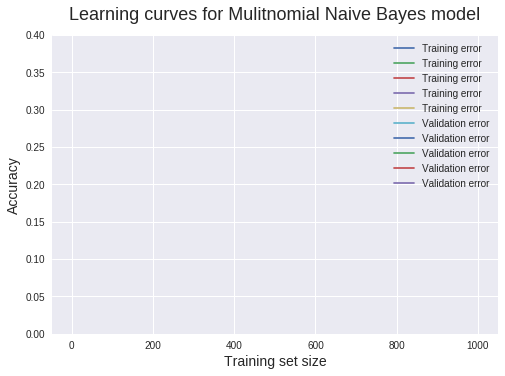

In [78]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Mulitnomial Naive Bayes model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.4)

### Question 4

### Part of speech tagging

Part of Speech (POS) tagging is the process of assigning Part of Speech tags to the words in a sentence. POS is performed at the token level. 

In [81]:
from nltk import pos_tag # function that tags words by their part of speech (POS)
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /users/grad/devesh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True


[6](https://www.kaggle.com/code/flippedbit/pos-tagging-movie-titles/notebook)

In [82]:
tagged_reviewtext_summary = df_clean['reviewTextSummaryMerge_withoutStopWords'].str.split().map(pos_tag)
tagged_reviewtext_summary.head()

278056    [(Mildly, RB), (amusing, VBG), (tiresome, JJ),...
948792    [(In, IN), (day, NN), (age, NN), (modern, JJ),...
638299    [(Spoilers, NNS), (Such, JJ), (great, JJ), (st...
21471     [(I, PRP), (book, NN), (office, NN), (since, I...
893151    [(This, DT), (book, NN), (wonderful, JJ), (If,...
Name: reviewTextSummaryMerge_withoutStopWords, dtype: object

In [83]:
tagged_reviewtext_summary = list(tagged_reviewtext_summary)

In [102]:
tagged_reviewtext_summary

[[('Mildly', 'RB'),
  ('amusing', 'VBG'),
  ('tiresome', 'JJ'),
  ('repetitive', 'JJ'),
  ('places', 'NNS'),
  ('Im', 'NNP'),
  ('tired', 'VBD'),
  ('endless', 'RB'),
  ('flipping', 'VBG'),
  ('times', 'NNS'),
  ('slippages', 'NNS'),
  ('seeming', 'VBG'),
  ('failure', 'NN'),
  ('realize', 'VB'),
  ('history', 'NN'),
  ('changed', 'VBN'),
  ('casually', 'RB'),
  ('searching', 'VBG'),
  ('relics', 'NNS'),
  ('Some', 'DT'),
  ('characters', 'NNS'),
  ('well', 'RB'),
  ('drawn', 'VBN'),
  ('final', 'JJ'),
  ('chapters', 'NNS'),
  ('lift', 'JJ'),
  ('interest', 'NN'),
  ('quality', 'NN'),
  ('rededication', 'NN'),
  ('cathedral', 'JJ'),
  ('nears', 'VBZ'),
  ('The', 'DT'),
  ('writing', 'NN'),
  ('clear', 'JJ'),
  ('well', 'RB'),
  ('paced', 'VBN'),
  ('However', 'RB'),
  ('I', 'PRP'),
  ('found', 'VBD'),
  ('less', 'RBR'),
  ('engaging', 'VBG'),
  ('The', 'DT'),
  ('Doomsday', 'NNP'),
  ('Book', 'NNP'),
  ('Mildly', 'NNP'),
  ('amusing', 'VBG'),
  ('tiresome', 'JJ'),
  ('repetitive', 'JJ'

Extracting the nouns only by filtering tags starting with 'NN'.

In [85]:
new_list = []
for i in tagged_reviewtext_summary:
    temp = [j[0] for j in i if j[1].startswith("NN")]
    new_list.append(temp)
    
print(new_list[:20])

[['places', 'Im', 'times', 'slippages', 'failure', 'history', 'relics', 'characters', 'chapters', 'interest', 'quality', 'rededication', 'writing', 'Doomsday', 'Book', 'Mildly', 'places'], ['day', 'age', 'media', 'trap', 'My', 'teeth', 'My', 'hair', 'thin', 'Should', 'cover', 'gray', 'Ugh', 'beauty', 'Satan', 'set', 'trap', 'women', 'convince', 'bodies', 'value', 'Heavenly', 'Father', 'prisons', 'words', 'views', 'behaviors', 'book', 'compilation', 'authors', 'everything', 'Time', 'Out', 'Women', 'speakers', 'children', 'LaNae', 'Valentine', 'Lisa', 'Tensmeyer', 'Hansen', 'perspectives', 'woman', 'pause', 'dialogue', 'Every', 'soul', 'God', 'see', 'book', 'wealth', 'inspiration', 'Discover', 'True', 'Beauty'], ['Spoilers', 'story', 'Kian', 'killer', 'hero', 'life', 'life', 'Fast', 'Jordan', 'Her', 'life', 'Choiceslet', 'everyone', 'Bamits', 'Jos', 'thats', 'Lots', 'lots', 'thing', 'part', 'stars', 'Jordan'], ['book', 'office', 'children', 'adults', 'way', 'Maurice', 'Sendak', 'mothers'

In [86]:
# converting all the upper case letters into lower case
new_list_lower = []
for i in range(len(new_list)):
    sent_ = str(new_list[i])
    sent_ = sent_.lower()
    sent_= sent_.split()
    sent_ = ' '.join(sent_)   
    new_list_lower.append(sent_)

#### Word Bag

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(stop_words='english') 
X1 = vectorizer1.fit_transform(new_list_lower) 
wordBag1 = pd.DataFrame(X1.A, columns=vectorizer1.get_feature_names())

wordBag1


,aa,aana,aargh,aaron,ab,abadaba,abagail,abandon,abandonados,abandoned,...,zucchini,zuccoto,zulfiqar,zuni,zuri,zurich,zusak,zusaks,zuzak,zwingli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TD-IDF: Term frequency-inverse document frequency

Creating tdidf model for data only containing nouns.

In [88]:
#  Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(stop_words='english', max_df=1.0, min_df=1, use_idf=False) 
X2 = vectorizer2.fit_transform(new_list_lower) 
TFIDF_2 = pd.DataFrame(np.round(X2.A,3), columns=vectorizer2.get_feature_names())
TFIDF_2

,aa,aana,aargh,aaron,ab,abadaba,abagail,abandon,abandonados,abandoned,...,zucchini,zuccoto,zulfiqar,zuni,zuri,zurich,zusak,zusaks,zuzak,zwingli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Building a model 
Repeating Question 3 after extracting nouns only to obtain a bag-of-words tf-idf weighted vector representation.

In [89]:
# target feature
y.head()

,overall
278056,2
948792,5
638299,5
21471,5
893151,5


In [90]:
# splitting the data into training, testing and validation sets in the ratio of 60:20:20
X_train1, X_test1, y_train1, y_test1  = train_test_split(TFIDF_2, y, test_size = 0.2, random_state =
42)
print('X_train shape:', X_train1.shape)
print('y_train shape:', y_train1.shape)
print('X_test shape:', X_test1.shape)
print('y_test shape:', y_test1.shape)

X_train shape: (8000, 31772)
y_train shape: (8000, 1)
X_test shape: (2000, 31772)
y_test shape: (2000, 1)


In [91]:
X_train1, X_val1, y_train1, y_val1  = train_test_split(X_train1, y_train1, test_size = 0.25, random_state =
42)
print('X_val shape:', X_val1.shape)
print('y_val shape:', y_val1.shape)


X_val shape: (2000, 31772)
y_val shape: (2000, 1)


In [92]:
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf_1= MultinomialNB()

# use the training data to train the MNB model
nb_clf_1.fit(X_train1, y_train1)


MultinomialNB()

In [93]:
# Fitting the model
y_pred_train_ = nb_clf_1.predict(X_train1)
y_pred_val_ = nb_clf_1.predict(X_val1)
y_pred_test_ = nb_clf_1.predict(X_test1)

### Evaluation metrics

Using the same evaluation metrics that were used in the earlier model.

In [94]:
# Classification report
print(classification_report(y_train1, y_pred_train_))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       190
           2       0.00      0.00      0.00       223
           3       0.00      0.00      0.00       482
           4       1.00      0.00      0.01      1372
           5       0.62      1.00      0.77      3733

    accuracy                           0.62      6000
   macro avg       0.32      0.20      0.15      6000
weighted avg       0.62      0.62      0.48      6000



In [95]:
print(classification_report(y_val1, y_pred_val_))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        78
           3       0.00      0.00      0.00       205
           4       0.00      0.00      0.00       436
           5       0.61      1.00      0.76      1223

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



In [96]:
print(classification_report(y_test1, y_pred_test_))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00       184
           4       0.00      0.00      0.00       450
           5       0.61      1.00      0.76      1224

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



In [97]:
from sklearn import metrics
print('\nTraining Accuracy score:', metrics.accuracy_score(y_train1, y_pred_train_))
print('Validation Accuracy score:', metrics.accuracy_score(y_val1, y_pred_val_))
print('Testing Accuracy score:', metrics.accuracy_score(y_test1, y_pred_test_))



Training Accuracy score: 0.6228333333333333
Validation Accuracy score: 0.6115
Testing Accuracy score: 0.612


#### ROC AUC score

In [98]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_pred_probs_tr_ =  nb_clf_1.predict_proba(X_train1)
y_pred_probs_va_ =  nb_clf_1.predict_proba(X_val1)
y_pred_probs_te_ = nb_clf_1.predict_proba(X_test1)


print('\nTraining ROC AUC score', roc_auc_score(y_train1, y_pred_probs_tr_, average="weighted", multi_class="ovr"))
print('Validation ROC AUC score', roc_auc_score(y_val1, y_pred_probs_va_, average="weighted", multi_class="ovr"))
print('Testing ROC AUC score', roc_auc_score(y_test1, y_pred_probs_te_, average="weighted", multi_class="ovr"))



Training ROC AUC score 0.7630139148890116
Validation ROC AUC score 0.5849414293697982
Testing ROC AUC score 0.6100637370427366


The above ROC AUC scores show that performance on training set has improved after only nouns were extracted from the raw data. Whereas, performance on testing data has degraded as compared to the previous model.

### Hyperparamter tuning

In [99]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
parameters = {'alpha': (0.0001, 0.001, 0.01, 0.1, 1.0)}  
halving_random_ = HalvingRandomSearchCV(estimator=nb_clf_1, param_distributions=parameters, factor=3, n_jobs=-1, random_state=0)
halving_random_.fit(X_train1, y_train1)
halving_random_.best_estimator_
halving_random_.best_params_ 

{'alpha': 0.1}

Similar process was followed for hyperparameter tuning as we used HalvingRandomSearchCV again for quicker results. Like previous time, result shows that the model performs the best when the value of the parameter 'alpha' is 0.1 for multinomial Naive Bayes

### Statistical Significance Test
[7](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/)

In [146]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

labels = np.array(y)


# train_features, test_features, train_labels, test_labels = train_test_split(TFIDF_2, labels, test_size = 0.25, random_state = 42)

cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores1 = cross_val_score(nb_clf, TFIDF, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('First Model Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))


# important_indices = [df_update_list.index('brightness'), df_update_list.index('scan'), df_update_list.index('bright_t31')]
# train_important = train_features[["brightness", "scan", "confidence"]]
# test_important = test_features[["brightness", "scan", "confidence"]]

cv2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores2 = cross_val_score(nb_clf_1, TFIDF_2, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Second Model Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))


# score1 = rf.fit(train_important, train_labels).score(test_important, test_labels)
# score2 = lr.fit(train_important, train_labels).score(test_important, test_labels)

First Model Mean Accuracy: 0.618 (0.000)
Second Model Mean Accuracy: 0.618 (0.000)


Since we have used the same model (Multinomial Naive Bayes) for both the scenarios, i.e before POS and after POS, the mean accuracy in both the instances is the same. This implies that part of speech tagging did not really have an impact on model's preformance. 

### References

1. [4]2022. [Online]. Available: https://www.dataknowsall.com/bowtfidf.html#:~:text=TF%2DIDF%20stands%20for%20Term,(across%20the%20entire%20corpus). [Accessed: 23- Jul- 2022].

2. [5]K. Wali, "Explained: Stemming vs lemmatization in NLP", Analytics India Magazine, 2022. [Online]. Available: https://analyticsindiamag.com/explained-stemming-vs-lemmatization-in-nlp/#:~:text=Stemming%20is%20a%20faster%20process%20than%20lemmatization%20as%20stemming%20chops,has%20higher%20accuracy%20than%20stemming. [Accessed: 23- Jul- 2022].

3. Bex T., "Comprehensive Guide to Multiclass Classification Metrics". [Online] Available https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

4. "sklearn.model_selection.HalvingGridSearchCV". [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html


5.  
Stack Exchange, "should stemming and lemmatization both be used together or not? what is Best practice in NLP preprocessing?", [Online]. Available:
https://stats.stackexchange.com/questions/523066/should-stemming-and-lemmatization-both-be-used-together-or-not-what-is-best-pra


6. "POS tagging Movie Titles". [Online]. Available: https://www.kaggle.com/code/flippedbit/pos-tagging-movie-titles/notebook


7. Statistical Significance Tests for Comparing Machine Learning Algorithms
https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/